# 비지도 학습

## 목표
1. 비지도학습의 개념(, 지도학습과의 차이)
2. 주요 비지도학습 알고리즘 알기

## 1. 비지도학습의 개념

- 지도학습과 달리 training data에 정답label이 없는 데이터가 주어지는 학습 방법
- 즉 주어진 데이터가 어떻게 구성되어 있는지 스스로 알아내는 방법
- 스스로 데이터의 feature와 패턴을 기반으로 판단한다.
- 라벨링이 되어 있지 않은 데이터들 내에서 비슷한 특징이나 패턴을 가진 데이터들끼리 군집화한 후, 새로운 데이터가 어떤 군집에 속하는지를 추론한다.
- 대표적으로 군집화clustering, 차원 축소dimensionality reduction, 데이터 시각화, 생성 모델 generative model 등을 포함한다.

## 2. 주요 비지도학습 알고리즘 알기

### 1) 클러스터링 K-means

- 명확한 기준이 없는 상황에서 데이터를 분석해 가까운 / 유사한 것들끼리 묶어주는 작업
- 임의로 k개의 기준점을 중심으로 가장 가까운 데이터들을 뭉쳐 본다.

#### 1-1) 데이터 생성

In [2]:
# 모듈 import
import random

from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 중심점이 5개인 100개의 데이터를 무작위로 생성
points, labels = make_blobs(n_samples=100, centers=5, n_features=2, random_state=135)

# 무작위 데이터 중 10개의 좌표를 출력
print(points.shape, points[:10])

# 10개 점에 각각 대응하는 중심점(label) 값 출력
print(labels.shape, labels[:10])

(100, 2) [[ 4.63411914 -6.52590383]
 [-6.52008604  7.16624288]
 [ 2.14142339 -5.21092623]
 [ 1.70054231  8.54077897]
 [-0.33809159  8.76509668]
 [-7.69329744  7.94546313]
 [ 3.89090121 -3.06531839]
 [ 3.22338498 -2.93209009]
 [-6.63962964  5.34777334]
 [ 6.37904965 -6.46617328]]
(100,) [2 1 0 3 3 1 0 0 1 2]


In [4]:
# 임의로 지정한 k개의 중심점이 새로운 label 역할을 한다
print(labels)

[2 1 0 3 3 1 0 0 1 2 1 1 1 4 1 1 0 1 0 0 2 4 4 4 3 1 0 4 3 1 3 4 2 3 0 1 0
 3 3 3 4 0 4 2 4 4 2 2 1 0 4 1 2 1 4 2 1 1 1 1 3 2 3 1 3 2 2 2 3 4 4 0 4 3
 0 4 4 4 0 0 2 2 4 3 3 0 2 2 0 2 2 0 0 3 3 4 0 3 2 3]


,X,Y
0,4.634119,-6.525904
1,-6.520086,7.166243
2,2.141423,-5.210926
3,1.700542,8.540779
4,-0.338092,8.765097


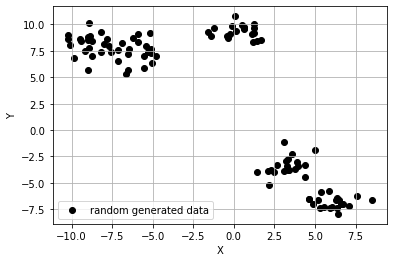

In [12]:
# 데이터들을 좌표에 그려보자
# 먼저 축 그리기
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 점들을 pd DataFrame 형태로 변환
points_df = pd.DataFrame(points, columns=['X', 'Y'])
display(points_df.head())

# grid에 점 시각화하기
ax.scatter(points[:, 0], points[:, 1], c='black', label='random generated data')

# 축 라벨 달기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

### 1-2) K-means 알고리즘 적용

- 데이터 간 거리는 유클리드 거리 또는 L2 distance로 구한다.
- [유클리디안 거리 설명](http://egloos.zum.com/metashower/v/9957577)
- K-means 알고리즘 순서
    - 1) 원하는 클러스터의 수 k를 결정
    - 2) 무작위로 클러스터의 수와 같은 k개의 중심점(centroid)을 선정. 각각은 클러스터를 대표한다.
    - 3) 나머지 점들과 모든 중심점 간의 L2를 계산한 후, 가장 가까운 거리를 가지는 중심점의 클러스터에 속하도록 한다.
    - 4) 각 중심점을 재조정한다. 특정 클러스터에 속하는 모든 점들의 평균값이 다음 iteration의 중심점이 된다(실제 데이터에 속하지 않아도 상관 없다).
    - 5) 재조정된 중심점을 바탕으로 모든 점들과 새로 조정된 중심점 간의 L2를 다시 계산하고, 가장 가까운 거리의 클러스터에 해당 점을 재배정한다.
    - 6) 위 4, 5를 반복한다. 반복 횟수는 사용자가 조절하고, 특정 iteration 이상이 되면 수렴한다.

In [14]:
from sklearn.cluster import KMeans

# 무작위 점 데이터에 k=5인 KMeans 알고리즘 적용
kmeans_cluster = KMeans(n_clusters=5)

# points에 대해 iteration 수행
kmeans_cluster.fit(points)

print(type(kmeans_cluster.labels_))
print(np.shape(kmeans_cluster.labels_))
print(np.unique(kmeans_cluster.labels_))

<class 'numpy.ndarray'>
(100,)
[0 1 2 3 4]


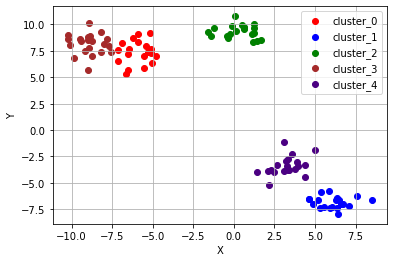

In [17]:
# 결과 시각화하기
# 먼저 n번째 클러스터 데이터를 어떤 색으로 도식할지를 dictionary에 저장
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3: 'brown', 4: 'indigo'}

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# clustering 결과대로 색깔별로 구분
for cluster in range(5):
    # 군집화된 sub data 분리하기
    cluster_sub_points = points[kmeans_cluster.labels_ == cluster]
    # 해당 sub data를 plot
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

### 1-3) K-means 알고리즘이 잘 동작하지 않는 예시들

- 1) 원형 분포
    - 가운데 작은 원과 바깥 큰 원으로 분류되기를 바라지만, 그렇게는 작동하지 않음
- 2) 초승달 분포
    - 두 개의 달을 분리하고 싶지만, 그냥 가운데를 기준으로 자른 형태가 됨
- 3) 대각선 분포

- 즉 아래 경우에 K-means 알고리즘은 적합하지 않다.
    - 군집의 개수 k를 미리 알거나 예측하기 어려운 경우
    - 데이터의 연관을 분포에 따른 유클리디안 거리로만 군집화해서 판단할 수 없는 경우

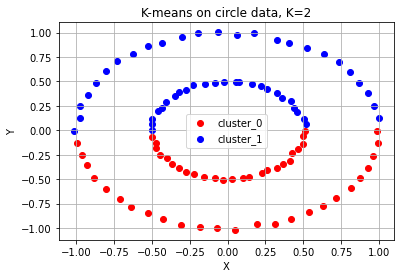

In [19]:
# 예시 1) 원형 분포
from sklearn.datasets import make_circles

# 원형 분포 데이터 100개 생성
circle_points, circle_labels = make_circles(n_samples=100, factor=0.5, noise=0.01)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 원형 분포에 대해 K-means 수행
circle_kmeans = KMeans(n_clusters=2)
circle_kmeans.fit(circle_points)
color_dict = {0: 'red', 1: 'blue'}

for cluster in range(2):
    cluster_sub_points = circle_points[circle_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))

ax.set_title('K-means on circle data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

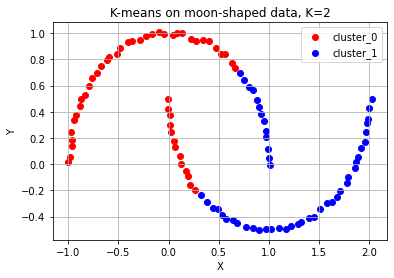

In [21]:
# 작동하지 않는 예시 2) 달 모양 분포
from sklearn.datasets import make_moons

moon_points, moon_labes = make_moons(n_samples=100, noise=0.01)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

moon_kmeans = KMeans(n_clusters=2)
moon_kmeans.fit(moon_points)
color_dict = {0: 'red', 1: 'blue'}

for cluster in range(2):
    cluster_sub_points = moon_points[moon_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))

ax.set_title('K-means on moon-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

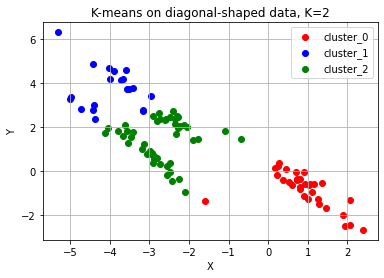

In [22]:
# 동작하지 않는 예시 3) 대각선 모양 분포
diag_points, _ = make_blobs(n_samples=100, random_state=170)

# 대각선 변환을 위한 대각 행렬
transformation = [[0.6, -0.6], [-0.4, 0.8]]

# 무작위 점 데이터를 대각선 분포로 변환
diag_points = np.dot(diag_points, transformation)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

diag_kmeans = KMeans(n_clusters=3)
diag_kmeans.fit(diag_points)

color_dict = {0: 'red', 1: 'blue', 2: 'green'}
for cluster in range(3):
    cluster_sub_points = diag_points[diag_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
    
ax.set_title('K-means on diagonal-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

### 2) 클러스터링 DBSCAN

- DBSCAN(Density Based Spatial Clustering of Applications with Noise)
- 밀도 기반의 군집 알고리즘
- 군집의 개수 k를 미리 지정할 필요가 없다.
- [설명 링크](http://primo.ai/index.php?title=Density-Based_Spatial_Clustering_of_Applications_with_Noise_(DBSCAN))

#### 2-1) DBSCAN 알고리즘 동작
- 용어 정리
    - epsilon: 클러스터의 반경
    - minPts: 클러스터를 이루는 개체의 최솟값
    - core points: 반경 epsilon 내에 minPts 개 이상의 점이 존재하는 중심점
    - border point: 군집의 중심이 되지는 못하지만, 군집에 속하는 점
    - noise point: 군집에 포함되지 못하는 점
    
- 동작 순서
    - 1) 임의의 점 p를 설정. p를 포함해 주어진 클러스터의 반경(epsilon) 안에 포함되어 있는 점들의 개수를 센다.
    - 2) 반경 안에 minPts개 이상의 점이 있으면, 해당 점 p를 core point로 간주하고, 포함되는 점들을 하나의 클러스터로 묶는다.
    - 3) 해당 원에 minPts개 미만의 점이 있으면, 일단 pass 한다.
    - 4) 모든 점에 대해 돌아가면서 1~3을 반복한다. 만일 새로운 점 p'가 core point가 되고, 이 점이 기존의 클러스터에 속하면, 두 개의 클러스터를 하나로 묶는다.
    - 5) 모든 점에 대해 클러스터링을 끝냈는데 어떤 점을 중심으로 해도 클러스터에 속하지 못하는 점이 있다면, 이를 noise point로 간주한다. 또 특정 군집에는 속하지만 core point가 아닌 점들을 border point라고 한다.
    
#### 2-2) 알고리즘 적용해보기

# of cluster: 2
DBSCAN Y-hat: [0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1
 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1
 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1]


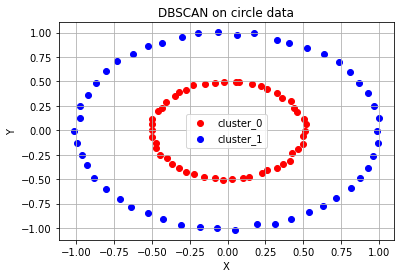

In [24]:
from sklearn.cluster import DBSCAN

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3: 'brown', 4: 'purple'}

epsilon, minPts = 0.2, 3
circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
circle_dbscan.fit(circle_points)

# 위 과정을 반복해서 얻은 클러스터의 개수
n_cluster = max(circle_dbscan.labels_) + 1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {circle_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = circle_points[circle_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
    
ax.set_title('DBSCAN on circle data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 2
DBSCAN Y-hat: [0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1
 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1
 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


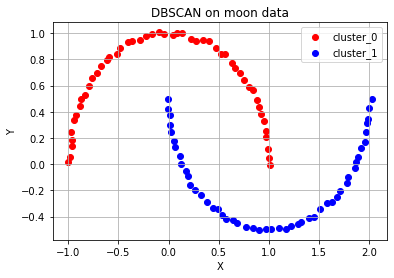

In [25]:
# 달 모양 분포 데이터 plot - 위와 같은 과정 반복
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.4, 3
moon_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
moon_dbscan.fit(moon_points)
n_cluster = max(moon_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {moon_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = moon_points[moon_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on moon data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 3
DBSCAN Y-hat: [ 0  1  1  0  0  2  2  0  1  2  2  2  0  2  0  1  2  2  2  1  1  1  1  1
  2  2  0  1  0  2  1  0  2  1  2  0  0  0  0  0  1  0  1  0  0  2  1  1
  0  2  1  1  2  1  0  2 -1  2  0  0  2  0  0  1  0  1  1  2  2  2 -1  0
  2  0  0  0  1  2  2 -1  2  2  1  2  0  0  2  1  1  2  1  1  2  0 -1  1
  0  0  0  1]


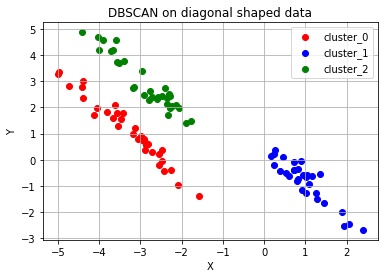

In [26]:
# 대각선 모양 분포 데이터 plot - 위와 같은 과정 반복
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.7, 3
diag_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
diag_dbscan.fit(diag_points)
n_cluster = max(diag_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {diag_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = diag_points[diag_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on diagonal shaped data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

**Y-hat 결과가 -1인 경우는 어느 군집에도 포함되지 못한 noise point를 나타냄**

#### 2-3) DBSCAN과 K-means 알고리즘 소요 시간 비교

# of samples: 100 / Elapsed time of K-means: 0.01737s / DBSCAN: 0.00135s
# of samples: 500 / Elapsed time of K-means: 0.02322s / DBSCAN: 0.00368s
# of samples: 1000 / Elapsed time of K-means: 0.02868s / DBSCAN: 0.00672s
# of samples: 2000 / Elapsed time of K-means: 0.02744s / DBSCAN: 0.01557s
# of samples: 5000 / Elapsed time of K-means: 0.60836s / DBSCAN: 0.05320s
# of samples: 7500 / Elapsed time of K-means: 0.55127s / DBSCAN: 0.10450s
# of samples: 10000 / Elapsed time of K-means: 0.58928s / DBSCAN: 0.19987s
# of samples: 20000 / Elapsed time of K-means: 0.71051s / DBSCAN: 0.42146s
# of samples: 30000 / Elapsed time of K-means: 0.50984s / DBSCAN: 0.79380s
# of samples: 40000 / Elapsed time of K-means: 0.57756s / DBSCAN: 1.41607s
# of samples: 50000 / Elapsed time of K-means: 0.58700s / DBSCAN: 2.12554s


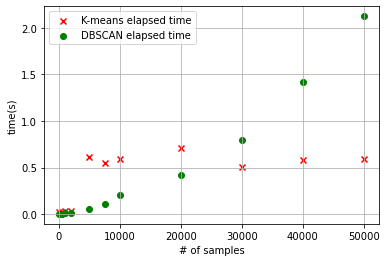

In [29]:
import time

n_samples= [100, 500, 1000, 2000, 5000, 7500, 10000, 20000, 30000, 40000, 50000]

kmeans_time = []
dbscan_time = []
x = []

for n_sample in n_samples:
    dummy_circle, dummy_labels = make_circles(n_samples=n_sample, factor=0.5, noise=0.01)
    
    # K-means 시간 측정
    kmeans_start = time.time()
    circle_kmeans = KMeans(n_clusters=2)
    circle_kmeans.fit(dummy_circle)
    kmeans_end = time.time()
    
    # DBSCAN 시간 측정
    dbscan_start = time.time()
    epsilon, minPts = 0.2, 3
    circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
    circle_dbscan.fit(dummy_circle)
    dbscan_end = time.time()
    
    x.append(n_sample)
    kmeans_time.append(kmeans_end - kmeans_start)
    dbscan_time.append(dbscan_end - dbscan_start)
    print("# of samples: {} / Elapsed time of K-means: {:.5f}s / DBSCAN: {:.5f}s".format(n_sample, kmeans_end-kmeans_start, dbscan_end-dbscan_start))
    
    
# 각 소요 시간 그래프화
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, kmeans_time, c='red', marker='x', label='K-means elapsed time')
ax.scatter(x, dbscan_time, c='green', label='DBSCAN elapsed time')
ax.set_xlabel('# of samples')
ax.set_ylabel('time(s)')
ax.legend()
ax.grid()

#### DBSCAN 알고리즘의 단점
- 1) 데이터가 많아질수록 수행 시간이 급격하게 늘어남
- 2) 클러스터 수를 지정할 필요는 없지만, 대신 데이터 분포에 맞는 epsilon과 minPts 값을 지정해야 함

<hr>

## 2) 차원 축소 - PCA

- 차원 축소를 사용하는 이유
    - : 데이터를 나타내는 여러 feature들 중에서 어떤 특징이 가장 그 데이터를 잘 represent하는지 알게 해주는 feature extraction의 용도로 사용된다.
- 그 중 PCA란?
    - 데이터 분포의 주성분을 찾아주는 방법
    - 주성분이란 데이터으 ㅣ분산이 가장 큰 방향 벡터를 의미
    - 데이터들의 분산을 최대로 보존하면서, 서로 직교하는 기저 basis(분산이 큰 방향 벡터의 축)들을 찾아 고차원 공간을 저차원 공간으로 사영(projection)한다.
    - 기존 feature 중 중요한 것을 선택하는 방식이 아니라 기존 feature를 선형 결합(linear combination)하는 방식을 사용한다.
    - 타원 데이터 분포에서 주성분 분석을 통한 basis
    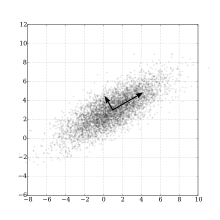
    
- 위 그림처럼 데이터들을 X-Y 좌표축 상에 표현하면, 데이터가 X성분과 Y성분으로 나뉠 수 있다. 위 그림의 짧은 화살표를 새로운 좌표축이라고 할 때, 이렇게 새로운 좌표계 역할을 할 수 있는 벡터의 모음을 기저(basis)라고 한다. 우리가 사용하는 좌표값은, 기저 벡터들의 선형 결합이다. 예를 들어 (1, 1)은 X 방향 1, Y 방향 1의 선형 결합이다.

- 위 그림과 같은 타원형 분포의 데이터에서, 차원의 수는 줄이면서 데이터 분포의 분산을 최대한 유지하기 위해 가장 분산이 긴 축을 첫 기저로 잡고, 그 기저에 직교하는 축 중 가장 분산이 큰 값을 다음 기저로 잡는다
- 이걸 반복하면서 차원의 수를 최대로 줄인다.
- 위와 같은 그림에서 여러 개의 차원으로 구성된 데이터들을 2개의 차원으로 축소해도 정보의 손실을 최소화하여 데이터의 분포를 충분히 표현할 수 있다.

- X-Y-Z 좌표 축 상에 존재하는 데이터를 X-Y, Y-Z 좌표축에 사영(projection)했다는 것은 각각 Z, X 좌표축을 무시했다는 뜻이다. 그만큼 정보 손실이 일어나는 것.
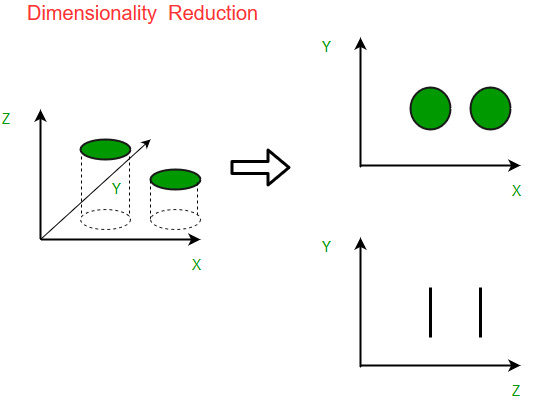

- 위 그림의 경우 원본 데이터의 특성을 상대적으로 잘 살리면서 차원을 1개 줄인 것은 X-Y라고 할 수 있다. 수학적으로는 Z축 방향 분산이 작다고 할 수 있고, 즉 Z축 방향의 정보는 상대적으로 덜 중요하다.
- 즉 가장 분산이 길게 나오는 기저 basis 방향을 찾아 그것만 남기고, 덜 중요한 기저 방향을 삭제하는 것이다. 이렇게 찾은 가장 중요한 기저를 주성분(Principal Component) 방향, 또는 PC축이라고 한다.

In [31]:
# 차원 축소 예제(유방암 데이터셋)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 가져오기
cancer = load_breast_cancer()

# y=0(Malignant: 악성 종양), y=1(Benign: 양성 종양)
cancer_X, cancer_y = cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y, test_size=0.1, random_state=10)
print("전체 검사자 수: {}".format(len(cancer_X)))
print(f'train dataset에 사용되는 검사자 수: {len(train_X)}')
print(f'test dataset에 사용되는 검사자 수: {len(test_X)}')
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

전체 검사자 수: 569
train dataset에 사용되는 검사자 수: 512
test dataset에 사용되는 검사자 수: 57


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**original data와 PCA를 적용한 data를 SVM classifier로 훈련시킨 후 결과를 비교해보자.**

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import accuracy_score
from collections import Counter

# color dictionary
color_dict = {0: 'red', 1: 'blue', 2:'red', 3:'blue'}
target_dict = {0: 'malignant_train', 1: 'benign_train', 2: 'malignant_test', 3:'benign_test'}

#Train data에 PCA 알고리즘 적용
train_X_ = StandardScaler().fit_transform(train_X) # 불러온 데이터에 대한 정규화 -> 각 column의 range of value가 전부 다르기 때문에 정규화를 진행해 주어야 합니다.
train_df = pd.DataFrame(train_X_, columns=cancer['feature_names'])
pca = PCA(n_components=2) # 주성분의 수를 2개, 즉 기저가 되는 방향벡터를 2개로 하는 PCA 알고리즘 수행
pc = pca.fit_transform(train_df)

In [33]:
#Test data에 PCA 알고리즘 적용
test_X_ = StandardScaler().fit_transform(test_X) # normalization
test_df = pd.DataFrame(test_X_, columns=cancer['feature_names'])
pca_test = PCA(n_components=2)
pc_test = pca_test.fit_transform(test_df)

In [34]:
# 훈련한 classifier의 decision boundary를 그리는 함수
def plot_decision_boundary(X, clf, ax): 
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, cmap='Blues')

# PCA를 적용한 train data의 classifier 훈련: classfier로 Support Vector Machine(SVM) 사용
clf = svm.SVC(kernel = 'rbf', gamma=0.5, C=0.8) # 여기서는 classifier로 SVM을 사용한다는 정도만 알아둡시다!
clf.fit(pc, train_y) # train data로 classifier 훈련

# PCA를 적용하지 않은 original data의 SVM 훈련
clf_orig = svm.SVC(kernel = 'rbf', gamma=0.5, C=0.8) # 여기서는 classifier로 SVM을 사용한다는 정도만 알아둡시다!
clf_orig.fit(train_df, train_y)

SVC(C=0.8, gamma=0.5)

PCA 분석을 사용한 Test dataset accuracy: 54명/57명 => 0.947
PCA를 적용하지 않은 Test dataset accuracy: 43명/57명 => 0.754


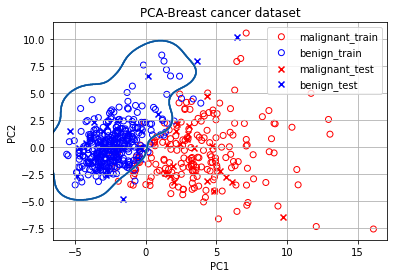

In [35]:
# 캔버스 도식
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# malignant와 benign의 SVM decision boundary 그리기
plot_decision_boundary(pc, clf, ax)

#Train data 도식
for cluster in range(2):
    sub_cancer_points = pc[train_y == cluster]
    ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:, 1], edgecolor=color_dict[cluster], c='none', label=target_dict[cluster])
#Test data 도식
for cluster in range(2):
    sub_cancer_points = pc_test[test_y == cluster]
    ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:, 1], marker= 'x', c=color_dict[cluster+2], label=target_dict[cluster+2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA-Breast cancer dataset')
ax.legend()
ax.grid()

# Scoring
pca_test_accuracy_dict = Counter(clf.predict(pc_test) == test_y)
orig_test_accuracy_dict = Counter(clf_orig.predict(test_df) == test_y)

print("PCA 분석을 사용한 Test dataset accuracy: {}명/{}명 => {:.3f}".format(pca_test_accuracy_dict[True], sum(pca_test_accuracy_dict.values()), clf.score(pc_test, test_y)))
print("PCA를 적용하지 않은 Test dataset accuracy: {}명/{}명 => {:.3f}".format(orig_test_accuracy_dict[True], sum(orig_test_accuracy_dict.values()), clf_orig.score(test_df, test_y)))

단 2개의 주성분 feature 만으로 분류한 PCA classifier의 정확도가 30개의 feature를 모두 사용한 original classifier보다 훨씬 높은 분류 정확도를 보여준다.

모든 feature를 이용한 방식의 정확도가 더 낮은 이유 중 하나는 제공된 30개의 feature 중 종양의 악성/양성과 관련 없는 것이 존재해서 해당 feature가 오히려 분류를 방해했기 때문.

그래서 feature의 수가 적더라도, 악성/양성과 관련이 깊은 중요한 feature만을 이용한 분류의 정확도가 훨씬 더 높을 수 있는 것.

**즉 PCA는 각 feature 간 상관관계가 있고 이를 추릴 필요가 있을 때 유용하게 사용되는 비지도학습 방법 중 하나.**

<hr>

## 2-2) 차원 축소 - T-SNE

- T-Stochastic Neighbor Embedding
- 시각화에 많이 쓰이는 알고리즘
- 아래 이미지처럼 방사형, 비선형 데이터는 많은 정보량을 담기 위한 주성분으로 잡을 선형 축을 찾기가 어렵다.
- 따라서 PCA를 이용해 2차원으로 표현하면, 멀리 있는 데이터가 가까이 있도록 차원 축소가 이루어진다. 
- T_SNE는 기존 차원의 공간에서 가까운 점들은, 차원 축소된 공간에서도 여전히 가깝게 유지되도록 한다.
- PCA는 데이터가 가진 고유한 물리적 정보량을 보존하는 데 주력하고, T-SNE는 고유한 물리적 정보량보다는 데이터들 간의 상대적 거리를 보존하는 데 주력한다.

In [36]:
# fetch_openml 함수를 이용해 MNIST 데이터 가져오기
print("실행 중입니다... 시간이 다소 걸릴 수 있어요. :)\n===")

from sklearn.datasets import fetch_openml

# 784 pixel로 이뤄진 mnist 이미지 데이터 호출
mnist = fetch_openml("mnist_784",version=1)

X = mnist.data / 255.0
y = mnist.target
print("X shape: ",X.shape)
print("Y shape: ",y.shape)

실행 중입니다... 시간이 다소 걸릴 수 있어요. :)
===
X shape:  (70000, 784)
Y shape:  (70000,)


In [37]:
n_image = X.shape[0]
n_image_pixel = X.shape[1]

#  픽셀정보가 있는 칼럼의 이름을 담은 목록
pixel_columns = [ f"pixel{i}" for i in range(1, n_image_pixel + 1) ]
len(pixel_columns)

784

In [38]:
df = pd.DataFrame(X,columns=pixel_columns)
df['y'] = y

# 숫자 라벨을 스트링으로 만드는 함수를 전체 데이터에 적용
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None

In [39]:
# 결과가 재생산 가능하도록 랜덤 시드를 지정
np.random.seed(30)

# 이미지 데이터의 순서를 랜덤으로 뒤바꾼(permutation) 배열 담기
rndperm = np.random.permutation(n_image)

# 랜덤으로 섞은 이미지 중 10,000개를 뽑고, df_subset에 담기
n_image_sample = 10000
random_idx = rndperm[:n_image_sample]
df_subset = df.loc[rndperm[:n_image_sample],:].copy()
df_subset.shape

(10000, 786)

<Figure size 432x288 with 0 Axes>

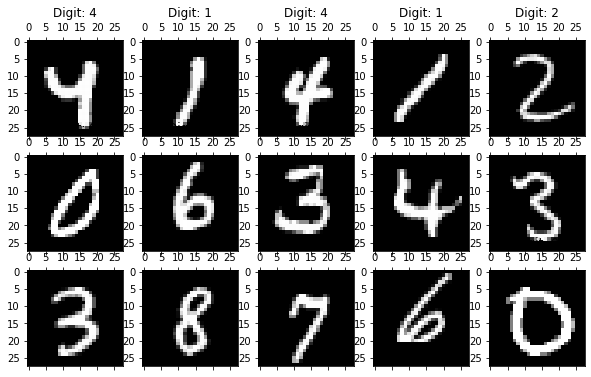

In [40]:
import seaborn as sns

plt.gray()
fig = plt.figure( figsize=(10,6) )
n_img_sample = 15
width,height = 28,28

# 15개 샘플을 시각화
for i in range(0,n_img_sample):
    row = df_subset.iloc[i]
    ax = fig.add_subplot(3,5,i+1, title=f"Digit: {row['label']}")
    ax.matshow(row[pixel_columns]
               .values.reshape((width,height))
               .astype(float))

plt.show()

In [41]:
print("df_subset의 shape: {}".format(df_subset.shape))

n_dimension = 2 # 축소시킬 목표 차원의 수
pca = PCA(n_components=n_dimension)

pca_result = pca.fit_transform(df_subset[pixel_columns].values) # 차원을 축소한 결과
df_subset['pca-one'] = pca_result[:,0] # 축소한 결과의 첫 번째 차원 값
df_subset['pca-two'] = pca_result[:,1] # 축소한 결과의 두 번째 차원 값

print("pca_result의 shape: {}".format(pca_result.shape))

df_subset의 shape: (10000, 786)
pca_result의 shape: (10000, 2)


In [42]:
print(f"pca-1: {round(pca.explained_variance_ratio_[0],3)*100}%")
print(f"pca-2: {round(pca.explained_variance_ratio_[1],3)*100}%")

pca-1: 9.6%
pca-2: 7.3%


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

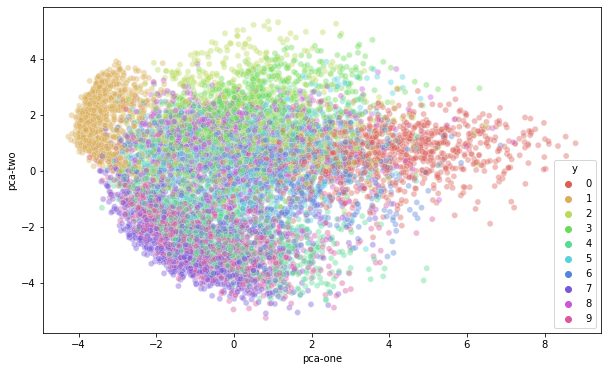

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,   # 2개의 PC축만 남은 데이터프레임 df_subset 을 시각화해 보자.
    legend="full",
    alpha=0.4
)

In [45]:
from sklearn.manifold import TSNE

print("df_subset의 shape: {}".format(df_subset.shape))

data_subset = df_subset[pixel_columns].values
n_dimension = 2
tsne = TSNE(n_components=n_dimension)
tsne_results = tsne.fit_transform(data_subset)

print("tsne_results의 shape: {}".format(tsne_results.shape))

df_subset의 shape: (10000, 788)
tsne_results의 shape: (10000, 2)


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

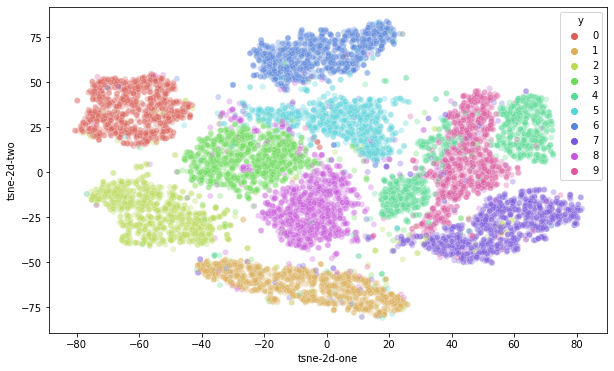

In [46]:
# tsne 결과를 차원별로 추가
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

# 시각화해 봅니다.
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

#### PCA와 구분되는 T-SNE의 뚜렷한 특징

- PCA를 통해 차원축소를 하면서 발생하는 정보 손실의 과정 중에는 두 점 사이의 거리라는 중요한 정보가 함께 손실된다.
- 만약 두 점의 거리가 PCA의 PC축을 따라 발생한 거리라면 유지가 되겠지만, 그렇지 않다면 PCA 과정을 통해 두 점 사이의 거리가 소거되고, 실제로는 먼 거리의 점들이 아주 가까운 점으로 투영될 가능성이 있다.
- 그 결과로 이전 스텝에서 PCA의 시각화 화면을 보면 다른 숫자들 사이의 경계가 불분명할 정도로 분포가 뒤섞여 있는 것을 확인할 수 있다.

- 반면에, T-SNE에서는 고차원에서 먼 거리의 두 점은 저차원에서도 먼 거리에 있어야 한다. 그러므로 결과적으로 T-SNE를 시각화하면 숫자들 사이의 경계가 뚜렷이 나타나는 장점이 있다. 위에서 T-SNE를 훈련시켰을 때 label 정보를 전혀 참조하지 않고 df_subset[pixel_columns] 정보만 참고하여 얻은 결과이다.. 그래서 T-SNE는 분류기의 Feature Extractor 모델이 카테고리 간 분류 경계선을 뚜렷하게 유지하고 있는지를 확인하는 용도로 자주 쓰인다..

#### 그러면 T-SNE는 PCA보다 우월한 차원축소 기법일까? NO!
- T-SNE의 두 차원은 물리적 의미를 가지지 않는다.
- PCA는 정보 손실을 최소화하려는 관점을 가지고 있으므로, 그 결과 추출된 PC축은 주성분이라는 물리적 의미를 유지하고 있으며, 공분산을 통해 원본 데이터를 일정 부분 복원할 수 있는 가능성을 가지고 있다.
- 그러나 T-SNE는 정보 손실량에 주목하지 않으며, 그 결과 저차원 축이 아무런 물리적 의미를 가지지 못한다. 오직 시각화에만 유리할 뿐이다.

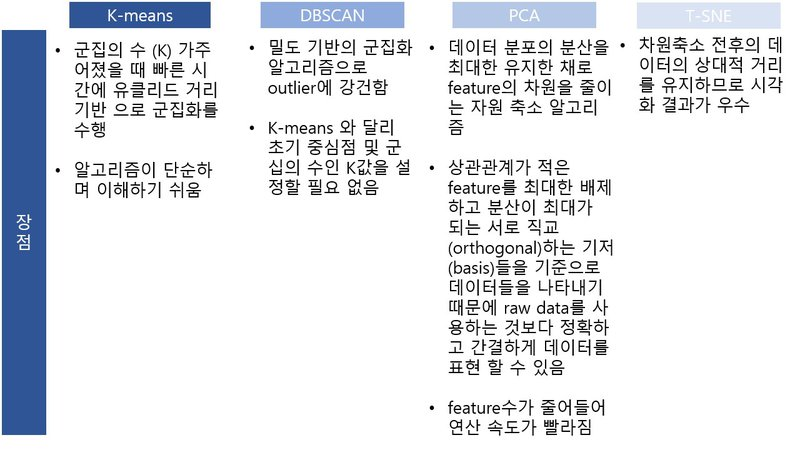